In [8]:
import arviz as az
import numpy as np
import pandas as pd
import pymc as pm
from pymc import invprobit
from pymc.math import exp
import matplotlib.pyplot as plt

In [3]:
x = np.array([0, 0, 2.5, 2.5, 5, 5, 7.5, 7.5, 10, 10, 12.5, 12.5, 20, 25, 25])
y = np.array([123, 123, 46, 48, 8, 11, 8, 7, 7, 2, 5, 1, 2, 0, 0])

In [6]:
data = pd.read_csv("nanowire.csv")
data

data.y.to_numpy() == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [54]:
with pm.Model() as m:
    x_data = pm.MutableData("x", x)

    θ_1_ = pm.Normal("θ_1_", 0, tau=.1)
    θ_3_ = pm.Normal("θ_3_", 0, tau=.1)
    θ_4_ = pm.Normal("θ_4_", 0, tau=.1)
    
    θ_1 = pm.Deterministic("θ_1", exp(θ_1_))
    θ_2 = pm.Uniform("θ_2", 0, 1)
    θ_3 = pm.Deterministic("θ_3", exp(θ_3_))
    θ_4 = pm.Deterministic("θ_4", exp(θ_4_))

    μ = θ_1 * exp(-θ_2 * x_data**2) + θ_3 * (1 - exp(-θ_2 * x_data**2)) * invprobit(
        -x_data / θ_4
    )

    lik = pm.Poisson("likelihood", mu=μ, observed=y)

    trace = pm.sample(10000)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ_1_, θ_3_, θ_4_, θ_2]


/Users/aaron/mambaforge/envs/pymc-dev-py39/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/aaron/mambaforge/envs/pymc-dev-py39/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/aaron/mambaforge/envs/pymc-dev-py39/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/aaron/mambaforge/envs/pymc-dev-py39/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 15 seconds.
The acceptance probability does not match the target. It is 0.8874, but should be close to 0.8. Try to increase th

In [55]:
az.summary(trace, hdi_prob=0.95, var_names=["~θ_1_", "~θ_3_", "~θ_4_"], kind="stats")

,mean,sd,hdi_2.5%,hdi_97.5%
θ_2,0.185,0.027,0.133,0.238
θ_1,122.893,7.872,107.915,138.567
θ_3,27.002,7.698,12.867,42.276
θ_4,11.839,13.050,7.353,16.689


In [65]:
new_obs = np.array([2.0])
pm.set_data({"x": new_obs}, model=m)
ppc = pm.sample_posterior_predictive(trace, model=m)
az.summary(ppc, hdi_prob=.95)

/Users/aaron/mambaforge/envs/pymc-dev-py39/lib/python3.9/site-packages/arviz/stats/stats.py:1180: UserWarning: Selecting first found group: posterior_predictive
  warnings.warn(f"Selecting first found group: {data.groups()[0]}")


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
likelihood[0],64.937,9.322,46.0,82.0,0.048,0.034,38183.0,38290.0,1.0


In [21]:
test = pm.draw(pm.LogNormal.dist(0, .1), 1000000)
test2 = np.exp(pm.draw(pm.Normal.dist(0, .1), 1000000))

<AxesSubplot:title={'center':'x'}>

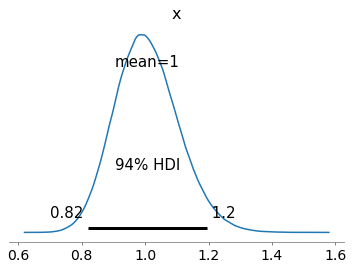

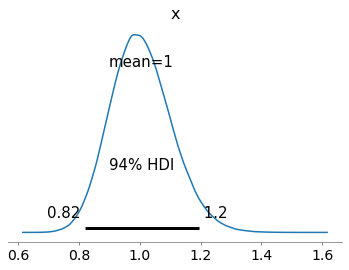

In [29]:
az.plot_posterior(test)
az.plot_posterior(test2)

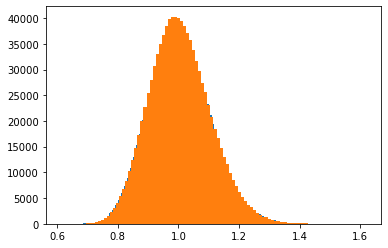

In [26]:
plt.hist(test, bins=100)
plt.hist(test2, bins=100)

plt.show()

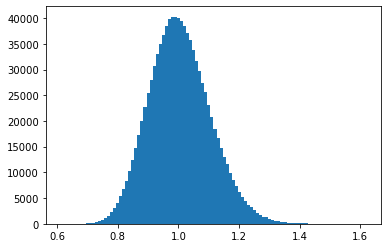

In [23]:
plt.show()

In [30]:
1/100

0.01

In [33]:
100**-2

0.0001